# Initialization - Loading The Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import seaborn as sns

DATASET_PATH = pathlib.Path("all_stocks_5yr.csv")

stocks_data = pd.read_csv(DATASET_PATH)

# (OPTIONAL) Choose a Stock Ticker
If you would like to only look at a given stock, you may send one into the input below and the code blocks to follow will use that chosen stock for all related purposes.

In [3]:

#stocks_data = stocks_data[stocks_data.Name == 'V']
stocks_data

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


# Training a Polynomial Regression model
For our Stock Data, we found that due to the nature of what our data holds a Polynomial Regression model would be able to accurately accomplish our goal of predicting the growth or decline of stocks within the S&P 500.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Convert date to a numerical value (days since start)
stocks_data['date'] = pd.to_datetime(stocks_data['date'])
stocks_data['days_since_start'] = (stocks_data['date'] - stocks_data['date'].min()).dt.days


# Aggregate data by averaging the closing prices for each day across all stocks
daily_avg_close = stocks_data.groupby('days_since_start')['close'].mean().reset_index()

# Prepare the data for polynomial regression
X = daily_avg_close['days_since_start'].values.reshape(-1, 1)
y = daily_avg_close['close'].values

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply polynomial regression with a degree of 2 for demonstration
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Train the model (Polynomial regression model as we are fitting the model with the code above)
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Make predictions for training & testing sets
y_train_pred = poly_model.predict(X_poly_train)
y_test_pred = poly_model.predict(X_poly_test)

# Evaluate the model accuracy
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_rmse, test_rmse, train_r2, test_r2

(np.float64(3.860395476076166),
 np.float64(4.034299878086423),
 0.9008653516894728,
 0.8896238519753656)

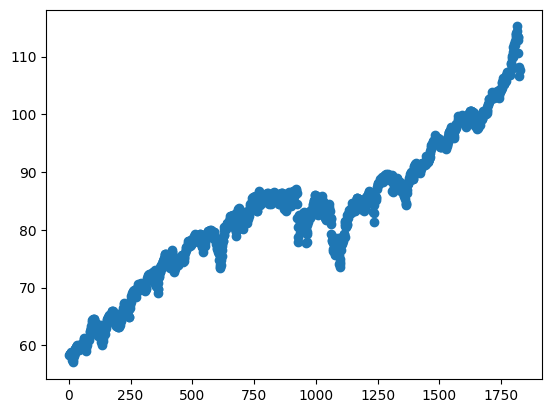

In [6]:
plt.scatter(X, y)

# Coefficient of Determination (R<sup>2</sup>)
When trained on the S&P 500 as a whole, our model has a coefficient of determination of 0.9009 (train) and 0.8896 (test), showing a high level of accuracy.

# Root Mean Squared Error
Displaying our RMSEs, we can see that our model trains as expected. When it comes to analyzing a model's RMSE values, you want to see similar outputs. Our model consistently has a difference of 0.17.

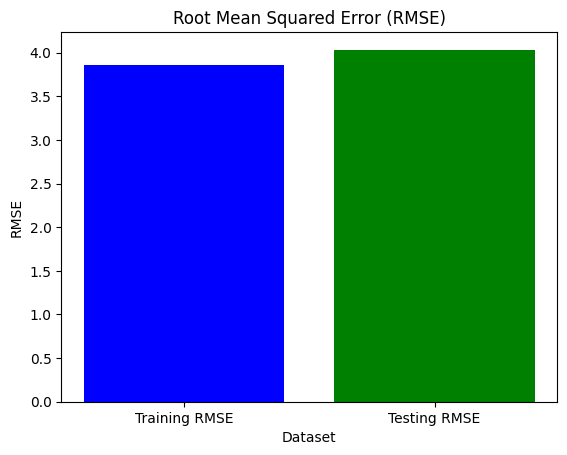

In [7]:
# Plotting our RMSE values
rmse_values = [train_rmse, test_rmse]
labels = ['Training RMSE', 'Testing RMSE']

plt.bar(labels, rmse_values, color=['blue', 'green'])
plt.xlabel('Dataset')
plt.ylabel('RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.show()


# Plot Model vs Actual data
To determine the accuracy of our model, we can plot the prediction accuracy vs. the actual data.

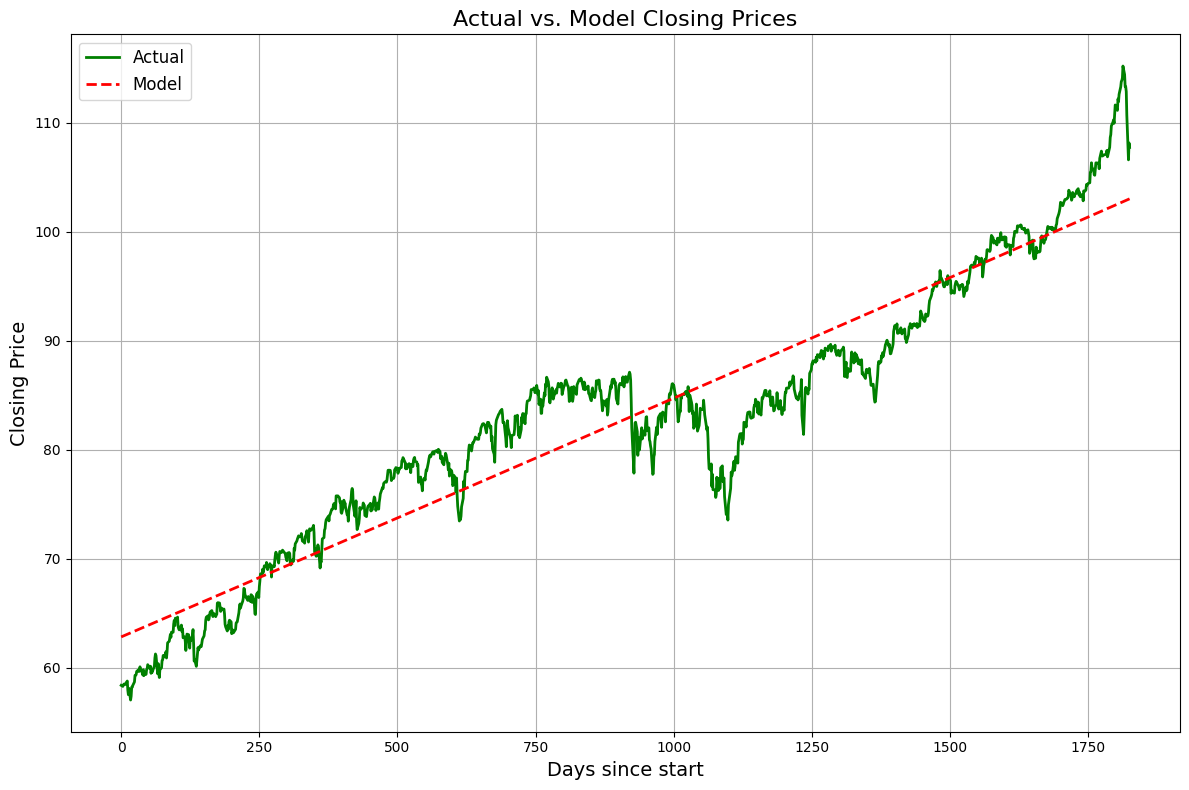

In [8]:
# Combining trained and test data
X_combined = np.concatenate((X_train, X_test))
y_combined = np.concatenate((y_train, y_test))
y_combined_pred = np.concatenate((y_train_pred, y_test_pred))
sort_indices_combined = np.argsort(X_combined.flatten())
X_combined_sorted = X_combined[sort_indices_combined]
y_combined_sorted = y_combined[sort_indices_combined]
y_combined_pred_sorted = y_combined_pred[sort_indices_combined]

plt.figure(figsize=(12, 8))

# Plotting our values
plt.plot(X_combined_sorted, y_combined_sorted, color='green', label='Actual', linewidth=2)
plt.plot(X_combined_sorted, y_combined_pred_sorted, color='red', label='Model', linestyle='--', linewidth=2)

# Set title and labels
plt.title('Actual vs. Model Closing Prices', fontsize=16)
plt.xlabel('Days since start', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)

plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


# Predict Future prices
Using our model, we can predict future prices of a given stock.

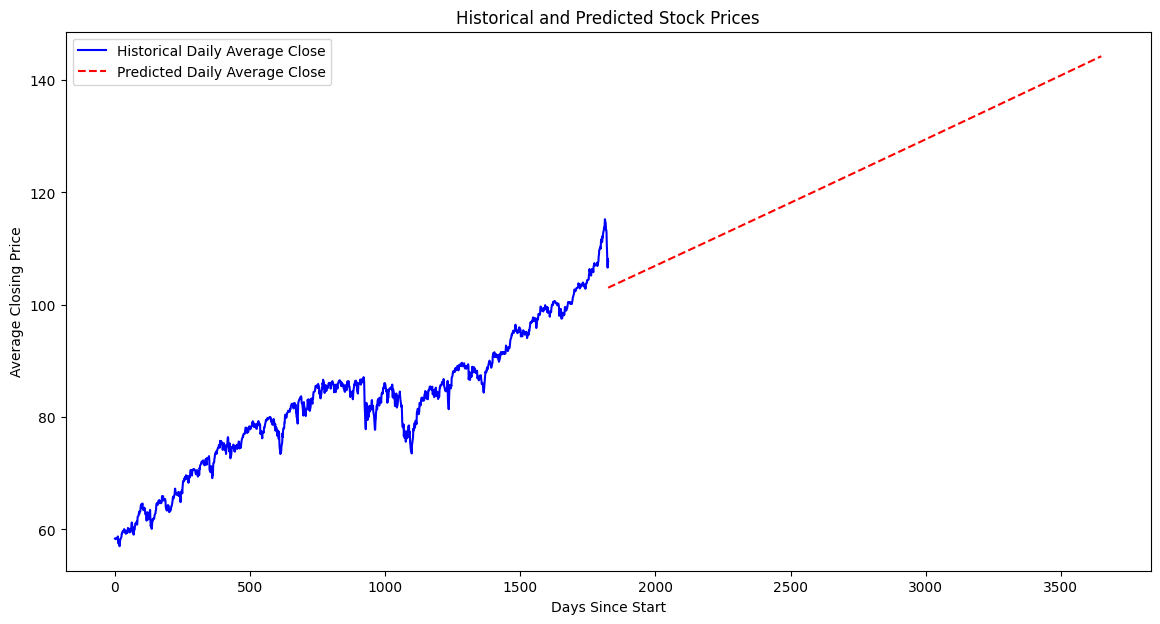

In [9]:
# Calculate the future time range in days since the start of the dataset
last_day = stocks_data['days_since_start'].max()
future_days = pd.date_range(start=stocks_data['date'].max(), periods=365*5 + 1)
future_days_since_start = (future_days - stocks_data['date'].min()).days

# Prepare the future data for polynomial regression prediction
X_future = future_days_since_start.values.reshape(-1, 1)
X_future_poly = poly_features.transform(X_future)

# Predict the future closing prices
y_future_pred = poly_model.predict(X_future_poly)

# Plotting
plt.figure(figsize=(14, 7))
# Historical data
plt.plot(daily_avg_close['days_since_start'], daily_avg_close['close'], label='Historical Daily Average Close', color='blue')
# Future predictions
plt.plot(future_days_since_start, y_future_pred, label='Predicted Daily Average Close', color='red', linestyle='--')

plt.title('Historical and Predicted Stock Prices')
plt.xlabel('Days Since Start')
plt.ylabel('Average Closing Price')
plt.legend()
plt.show()


# Predict Future Prices (different plotting library)
The code block below is displaying the same data as the chart above though it is plotted using a diffferent library that allows the user to interact with the chart.

In [16]:
import plotly.graph_objects as go
import plotly.io as pio
# Plotting
fig = go.Figure()

pio.renderers.default = 'browser'

# Historical data
fig.add_trace(go.Scatter(x=daily_avg_close['days_since_start'], y=daily_avg_close['close'],
                         mode='lines', name='Historical Daily Average Close', line=dict(color='green')))

# Future predictions
fig.add_trace(go.Scatter(x=future_days_since_start, y=y_future_pred,
                         mode='lines', name='Predicted Daily Average Close', line=dict(color='blue', dash='dash')))

# Customizing layout
fig.update_layout(title='Historical and Predicted Stock Prices',
                   xaxis_title='Days Since Start',
                   yaxis_title='Average Closing Price',
                   legend=dict(x=0, y=1, traceorder='normal', bgcolor='rgba(255, 255, 255, 0.5)'),
                   width=1000, height=600,
                   font=dict(family="Arial, sans-serif", size=12, color="black"),
                   title_font=dict(size=32, color='black'),
                   xaxis=dict(showline=True, linewidth=2, linecolor='black', mirror=True, showgrid=True),
                   yaxis=dict(showline=True, linewidth=2, linecolor='black', mirror=True, showgrid=True),
                   legend_title=dict(font=dict(size=14)),
                   legend_font=dict(size=12),
                   margin=dict(l=50, r=50, t=80, b=50),
                   hovermode='x',
                   hoverlabel=dict(font=dict(family="Arial, sans-serif", size=12, color="white"),
                                   bgcolor="black",
                                   bordercolor="black",
                                   namelength=-1))

fig.show()
